# Install Packages

In [79]:
import yfinance as yf
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd


# Import Data

In [80]:
sp500 = yf.Ticker('^GSPC')
sp500 = sp500.history(period='max')
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-12 00:00:00-04:00,5134.299805,5179.870117,5114.479980,5175.270020,4080510000,0.0,0.0
2024-03-13 00:00:00-04:00,5173.490234,5179.140137,5151.879883,5165.310059,4282890000,0.0,0.0
2024-03-14 00:00:00-04:00,5175.140137,5176.850098,5123.299805,5150.479980,4687970000,0.0,0.0


In [81]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-03-05 00:00:00-05:00', '2024-03-06 00:00:00-05:00',
               '2024-03-07 00:00:00-05:00', '2024-03-08 00:00:00-05:00',
               '2024-03-11 00:00:00-04:00', '2024-03-12 00:00:00-04:00',
               '2024-03-13 00:00:00-04:00', '2024-03-14 00:00:00-04:00',
               '2024-03-15 00:00:00-04:00', '2024-03-18 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24168, freq=None)

# Visualize data

<Axes: xlabel='Date'>

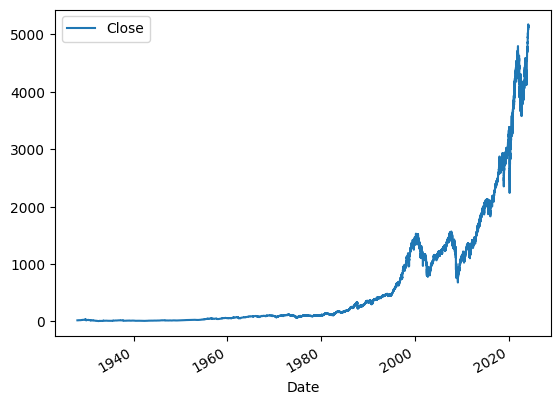

In [82]:
sp500.plot.line(y='Close', use_index=True)

# Clean Up Data

In [83]:
del sp500['Dividends']
del sp500['Stock Splits']
sp500['Tomorrow'] = sp500['Close'].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-03-12 00:00:00-04:00,5134.299805,5179.870117,5114.479980,5175.270020,4080510000,5165.310059
2024-03-13 00:00:00-04:00,5173.490234,5179.140137,5151.879883,5165.310059,4282890000,5150.479980
2024-03-14 00:00:00-04:00,5175.140137,5176.850098,5123.299805,5150.479980,4687970000,5117.089844


In [84]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-03-12 00:00:00-04:00,5134.299805,5179.870117,5114.479980,5175.270020,4080510000,5165.310059,0
2024-03-13 00:00:00-04:00,5173.490234,5179.140137,5151.879883,5165.310059,4282890000,5150.479980,0
2024-03-14 00:00:00-04:00,5175.140137,5176.850098,5123.299805,5150.479980,4687970000,5117.089844,0


In [85]:
sp500 = sp500.loc['2000-01-01':].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...
2024-03-12 00:00:00-04:00,5134.299805,5179.870117,5114.479980,5175.270020,4080510000,5165.310059,0
2024-03-13 00:00:00-04:00,5173.490234,5179.140137,5151.879883,5165.310059,4282890000,5150.479980,0
2024-03-14 00:00:00-04:00,5175.140137,5176.850098,5123.299805,5150.479980,4687970000,5117.089844,0


# Create ML Model

In [86]:


model = RandomForestClassifier(n_estimators=1000, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close', 'Open', 'High', 'Low', 'Volume']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [87]:
preds = model.predict(test[predictors])
preds

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [88]:
preds = pd.Series(preds, index=test.index)
preds

Date
2023-10-24 00:00:00-04:00    1
2023-10-25 00:00:00-04:00    1
2023-10-26 00:00:00-04:00    0
2023-10-27 00:00:00-04:00    0
2023-10-30 00:00:00-04:00    0
                            ..
2024-03-12 00:00:00-04:00    0
2024-03-13 00:00:00-04:00    0
2024-03-14 00:00:00-04:00    0
2024-03-15 00:00:00-04:00    0
2024-03-18 00:00:00-04:00    0
Length: 100, dtype: int64

## Test how accurate model is to real-world data

In [89]:
precision_score(preds, test['Target'])

0.21311475409836064

<Axes: xlabel='Date'>

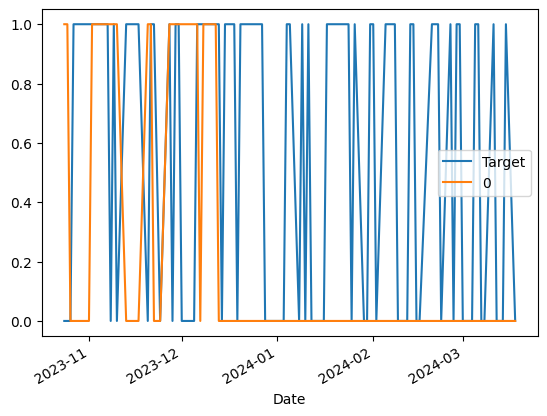

In [90]:
combined = pd.concat([test['Target'], preds], axis=1)
combined.plot()

# Create Backtesting system

In [91]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

def backtest(data, model, predictors, start=500, step= 250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)
    

In [92]:
predictions = backtest(sp500, model, predictors)

In [93]:
predictions['Predictions'].value_counts()

Predictions
1    2864
0    2726
Name: count, dtype: int64

In [94]:
precision_score(predictions['Target'], predictions['Predictions'])

0.526536312849162

# Adding additional Predictors

In [95]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']

    new_predictors += [ratio_column, trend_column]

In [96]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1094.040039,1098.469971,1094.040039,1095.890015,356070000,1109.479980,1,1.000845,1.0,1.002176,3.0,1.039354,34.0,1.137825,135.0,0.957328,485.0
2003-12-29 00:00:00-05:00,1095.890015,1109.479980,1095.890015,1109.479980,1058800000,1109.640015,1,1.006162,2.0,1.010755,4.0,1.050761,34.0,1.150837,135.0,0.969445,486.0
2003-12-30 00:00:00-05:00,1109.479980,1109.750000,1106.410034,1109.640015,1012600000,1111.920044,1,1.000072,2.0,1.007835,4.0,1.049591,34.0,1.150046,135.0,0.969833,486.0
2003-12-31 00:00:00-05:00,1109.640015,1112.560059,1106.209961,1111.920044,1027500000,1108.479980,0,1.001026,2.0,1.006997,4.0,1.050463,34.0,1.151439,136.0,0.972073,486.0
2004-01-02 00:00:00-05:00,1111.920044,1118.849976,1105.079956,1108.479980,1153200000,1122.219971,1,0.998451,1.0,1.001263,4.0,1.046073,33.0,1.147024,135.0,0.969348,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11 00:00:00-04:00,5111.959961,5124.660156,5091.140137,5117.939941,3896430000,5175.270020,1,0.999439,0.0,1.000285,2.0,1.044662,36.0,1.146956,141.0,1.261186,533.0
2024-03-12 00:00:00-04:00,5134.299805,5179.870117,5114.479980,5175.270020,4080510000,5165.310059,0,1.005570,1.0,1.007685,3.0,1.054685,36.0,1.158500,141.0,1.274412,534.0
2024-03-13 00:00:00-04:00,5173.490234,5179.140137,5151.879883,5165.310059,4282890000,5150.479980,0,0.999037,1.0,1.003379,2.0,1.051064,35.0,1.154953,141.0,1.271043,534.0


# Improving Model

In [97]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=50, random_state=1)

def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [98]:
predictions = backtest(sp500, model, new_predictors)

In [99]:
predictions['Predictions'].value_counts()

Predictions
0.0    3588
1.0    1001
Name: count, dtype: int64

In [100]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5394605394605395

# Accuracy 
<ul>
<li>In the end the model only ended up being 53% accurate.</li>
<li>This is a great base model to build upon since we have only used:</li>
<ul> 
<li> Time-sensitive Data</li>
<li> Rolling Averages</li>
<li> Trends</li>
</ul> 
<li> There are many more predictors which could be added such as hour-by-hour stock data, volatility of the market, sentiment in the market, etc...</li>
<li>Overall this was a good attempt at making an stock market prediction for the S&P 500</li>
</ul>
